 <h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'>Lecture 8 - ML and Plotting</h2>

We will be looking at the arrests dataset originally found in R. This is a sample set of arrests from the US for Marijuana posession. We wish to explore the data, and gain some insights into the arrested people.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Data read in
data = pd.read_csv('data/parrests.csv', index_col=0)
print("Column Names: ", data.columns.values)
data.head()

Column Names:  ['released' 'year' 'age' 'sex' 'employed' 'citizen' 'checks']


,released,year,age,sex,employed,citizen,checks
1,Yes,2002,21,Male,Yes,Yes,3
2,No,1999,17,Male,Yes,Yes,3
3,Yes,2000,24,Male,Yes,Yes,3
4,No,2000,46,Male,Yes,Yes,1
5,Yes,1999,27,Female,Yes,Yes,1


<h2 align='center'>Data - How do we show it?</h2>

### 1. Distribution of Gender

In [3]:
# Distribution of gender - male vs female
mf_Values = {}
for x in ("Male", "Female"):
    mf_Values[x] = len(data[data['sex'] == x])

print(mf_Values)

{'Male': 4783, 'Female': 443}


#### We can see that significantly more males are arrested than females, but how do we show this in a visually appealing manner?

Text(0.5, 0, 'Number of')

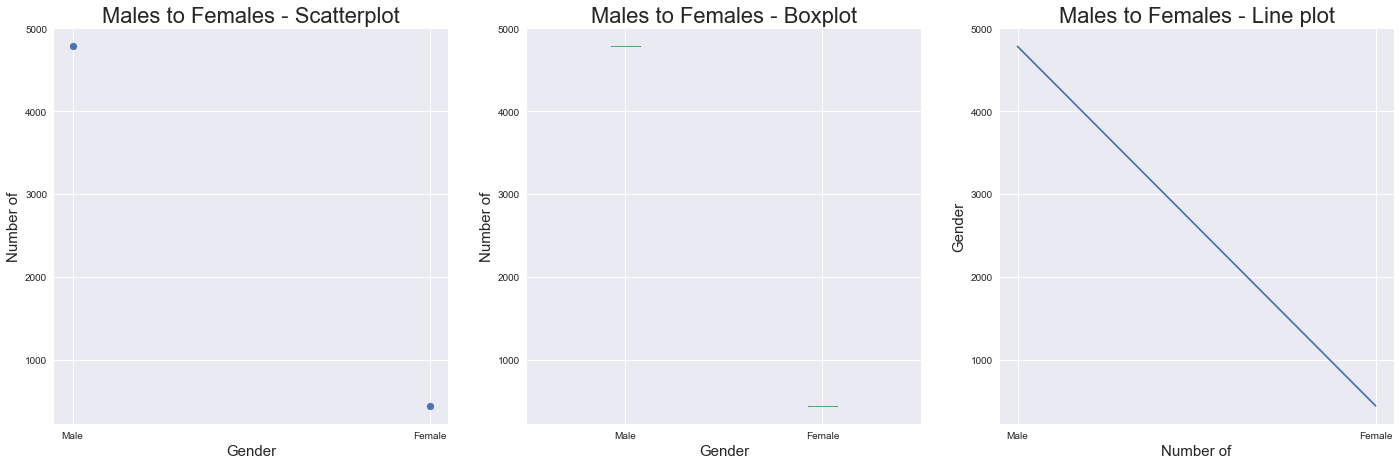

In [4]:
# Bad Plots
fig = plt.figure(figsize=(24,16))
# Attempt 1: Scatter Plot
ax1 = fig.add_subplot(231)
ax1.scatter(mf_Values.keys(), mf_Values.values())
ax1.set_title('Males to Females - Scatterplot', fontsize=22)
ax1.set_ylabel("Number of",fontsize=15)
ax1.set_xlabel("Gender",fontsize=15)

# Attempt 2: Box Plot
ax2 = fig.add_subplot(232)
ax2.boxplot([[mf_Values['Male']], [mf_Values['Female']]], labels=['Male', 'Female'])
ax2.set_title('Males to Females - Boxplot', fontsize=22)
ax2.set_ylabel("Number of",fontsize=15)
ax2.set_xlabel("Gender",fontsize=15)

# Attempt 3: Line Plot
ax3 = fig.add_subplot(233)
ax3.plot(mf_Values.keys(), mf_Values.values())    
ax3.set_title('Males to Females - Line plot', fontsize=22)
ax3.set_ylabel("Gender",fontsize=15)
ax3.set_xlabel("Number of",fontsize=15)

#### Yay? Nay?

Lets have another go.

Text(0.5, 0, 'Gender')

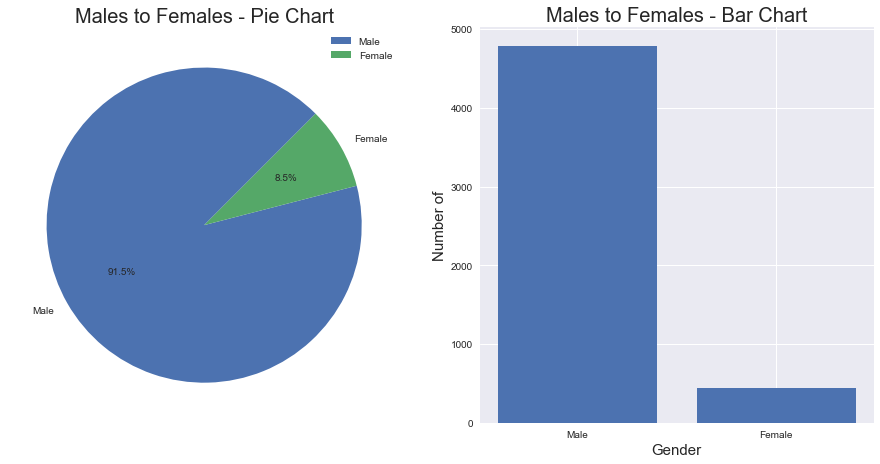

In [5]:
# Goodish Plots
fig2 = plt.figure(figsize=(24,16))

# Attempt 1: Pie Chart
ax4 = fig2.add_subplot(231)
ax4.pie(mf_Values.values(), labels=mf_Values.keys(), autopct='%1.1f%%', startangle=45)
ax4.set_title('Males to Females - Pie Chart', fontsize=20)
ax4.legend()

# Attempt 2: Bar Chart
ax5 = fig2.add_subplot(232)
ax5.bar(mf_Values.keys(), mf_Values.values())
ax5.set_title('Males to Females - Bar Chart', fontsize=20)
ax5.set_ylabel("Number of",fontsize=15)
ax5.set_xlabel("Gender",fontsize=15)

#### Much better !

### 2. Distribution of Age in Gender

In [6]:
# Age Values
df_male = data[data['sex'] == 'Male']
df_female = data[data['sex'] == 'Female']
df_female.head()

,released,year,age,sex,employed,citizen,checks
5,Yes,1999,27,Female,Yes,Yes,1
6,Yes,1998,16,Female,Yes,Yes,0
8,Yes,1998,34,Female,Yes,Yes,1
19,Yes,2001,32,Female,No,Yes,3
24,No,2000,27,Female,No,Yes,3


#### We already know the dataset contains more arrested males than females, but is the age distribution unique to each gender?

Text(0.5, 0, 'Gender')

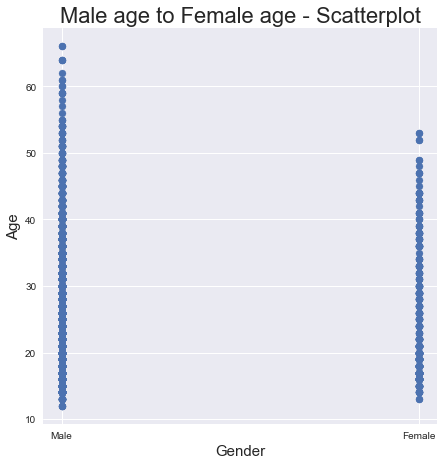

In [7]:
# Bad Plot/s
fig3 = plt.figure(figsize=(24,16))
# Attempt 1: Scatter Plot
ax6 = fig3.add_subplot(231)
ax6.scatter(list(data['sex']), list(data['age']))
ax6.set_title('Male age to Female age - Scatterplot', fontsize=22)
ax6.set_ylabel("Age",fontsize=15)
ax6.set_xlabel("Gender",fontsize=15)

#### Perfect Right?

Lets try again

Text(0.5, 1.0, 'Age of Male Arrests')

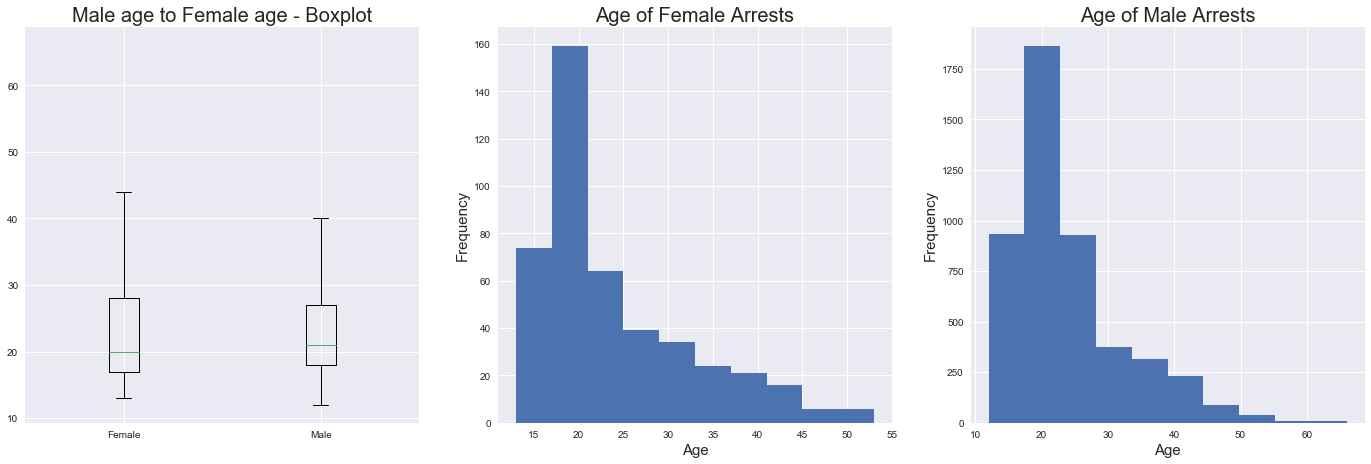

In [8]:
# Good-ish
fig4 = plt.figure(figsize=(24,16))
# Attempt 1: Boxplot
ax7 = fig4.add_subplot(231)
ax7.boxplot([list(df_female['age']), list(df_male['age'])], labels=['Female', 'Male'])
ax7.set_title('Male age to Female age - Boxplot', fontsize=20)

# Attempt 2: 2 x Histograms
ax8 = fig4.add_subplot(232)
ax8.hist(df_female.age.values)
ax8.set_ylabel("Frequency",fontsize=15)
ax8.set_xlabel("Age",fontsize=15)
ax8.set_title('Age of Female Arrests', fontsize=20)
ax9 = fig4.add_subplot(233)
ax9.hist(df_male.age.values)
ax9.set_ylabel("Frequency",fontsize=15)
ax9.set_xlabel("Age",fontsize=15)
ax9.set_title('Age of Male Arrests', fontsize=20)


### 3. Multi-line Graphing

Police are curious, what was the average age for arrests over the years in the dataset? Was there a difference between the male average age and female average age each year?

In [9]:
# Data collation
male_year_arrests = {}
female_year_arrests = {}
years = sorted(data.year.unique())
for yr in years:
    # finds the mean of the age of the records that are (Male | Female) and were arrested in the year specified in the for loop, rounding to 2dp
    male_year_arrests[yr] = np.round(np.mean((data[(data['sex'] == 'Male') & (data['year'] == yr)]).age), 2)
    female_year_arrests[yr] = np.round(np.mean((data[(data['sex'] == 'Female') & (data['year'] == yr)]).age), 2)

print("Male average age", male_year_arrests)
print("")
print("Female average age", female_year_arrests)

Male average age {1997: 24.09, 1998: 23.64, 1999: 24.28, 2000: 23.62, 2001: 23.97, 2002: 23.41}

Female average age {1997: 22.06, 1998: 24.0, 1999: 23.77, 2000: 21.85, 2001: 25.37, 2002: 22.72}


We have our data, now it is time to plot ! After all our struggles before, here is an okay example. How else could we do this?

Text(0.5, 0, 'Year')

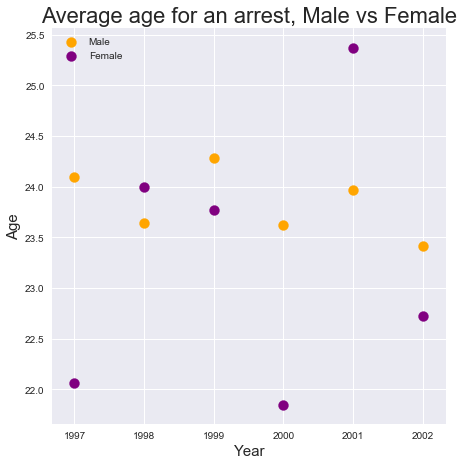

In [10]:
#Scatter Plot
fig5 = plt.figure(figsize=(24,16))
ax10 = fig5.add_subplot(233)
ax10.scatter(male_year_arrests.keys(), male_year_arrests.values(), s=100, c='orange')
ax10.scatter(female_year_arrests.keys(), female_year_arrests.values(), s=100, c='purple')
ax10.legend(['Male', 'Female'], loc=2)
ax10.set_title('Average age for an arrest, Male vs Female', fontsize=22)
ax10.set_ylabel("Age",fontsize=15)
ax10.set_xlabel("Year",fontsize=15)

<h2 align='center'>ML Regression - Vegas</h2>

#### What happens in Vegas doesn't stay in Vegas anymore.

The COMP2420 teaching staff are organising a group trip to Las Vegas during the mid semester break to escape the cold. Harry has been exploring options for places to stay, but is unsure on how trustworthy Trip Advisor is. The tutors are interested in how users might come to the decision on their scores, and how their past review experience and helpfulness can impact the final score.

In [11]:
# Importing Data
vegas = pd.read_csv('data/trip_advisor.csv', sep=';')
vegas['Hotel stars'] = vegas['Hotel stars'].str.replace(',','.')
vegas.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


The **initial** hypothesis is as follows:

- The score provided by a user is directly impacted by the Hotel Stars, Nr. reviews, Nr. hotel reviews, Helpful votes and Member years

We can use linear regression to test this !

In [12]:
# Linear regression object
lm = LinearRegression()

We can look at the input to the linear regression module in terms of **Features (x)** & **Output (y)**.

In [13]:
# Features

x = vegas[['Hotel stars', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Member years']]
y = vegas.Score

Once filtering our 'x' and 'y' values, we can plug it into the 'lm' object and see what happens

In [14]:
lm.fit(x, y)
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficients: [ 0.25140057 -0.00116826  0.00215945  0.00102964 -0.0004802 ]
Intercept: 3.070801624339195


We can see we have the Coefficients and Intercept, but we don't actually have a way to test our hypothesis since we have no testing data. Luckily, we can construct that from our training data. Lets try this again!

In [15]:
# Round 2

lm2 = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

lm2.fit(x_train,y_train)

# Accuracy
print("Accuracy (R^2):")
print(lm2.score(x_test, y_test))

Accuracy (R^2):
-3.699590033006121


#### Recall the R^2 specification (as per sklearn.linear_model.LinearRegression)
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

------------

So, in short.. Our hypothesis is **very** wrong !

How could we have done better?